In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import image as mp_image
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from scipy.ndimage import convolve, correlate, filters
from scipy import misc,ndimage


# Necessario per mostrare le figure nei notebooks
%matplotlib inline


img_src = './data/'

In [2]:
def img_show(image,**argv):
    plt.figure(figsize=(10,10))
    plt.imshow(image,**argv) # display the image
    plt.axis('off') 
    plt.show()


def img_info(image):
    print(image.shape, image.dtype, type(image)) 
    
    
def get_contrast(img):
    return np.max(img*255) - np.min(img*255)

def base_stats(img):
    return "Contrasto: {0:.0f} (valore massimo: {1:.0f}; valore minimo: {2:.0f})".format(get_contrast(img),np.max(img*255),np.min(img*255))

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def normalize(img):
    return (img-np.min(img))/(np.max(img)-np.min(img))

## Sobel Filters

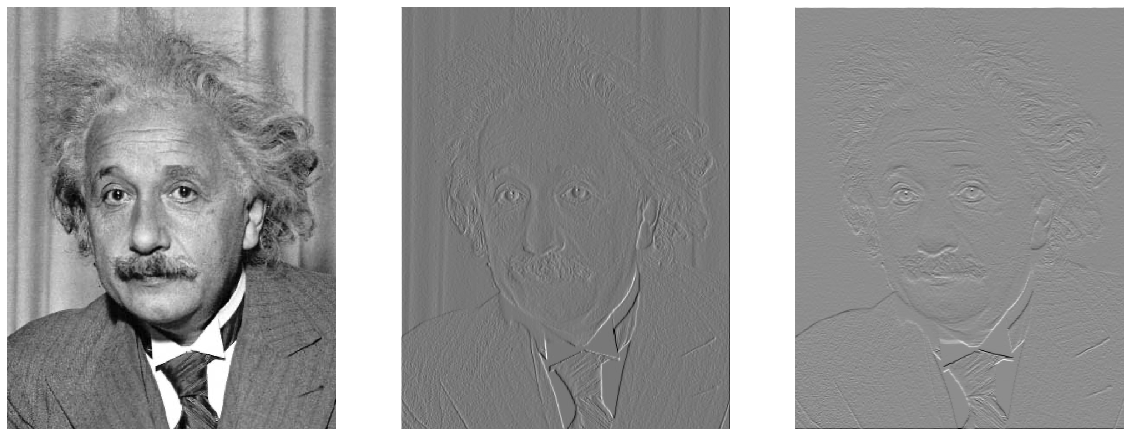

In [3]:
image = mp_image.imread(os.path.join(img_src,'einstein2.png'))
image = image[:,:,0]


sobelH = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

sobelV = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 3, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(convolve(image,sobelH,mode='constant', cval=0.0)
           ,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(convolve(image,sobelV,mode='constant', cval=0.0)
           ,cmap=cm.gray)
plt.axis('off')



plt.show()

## Laplaciano

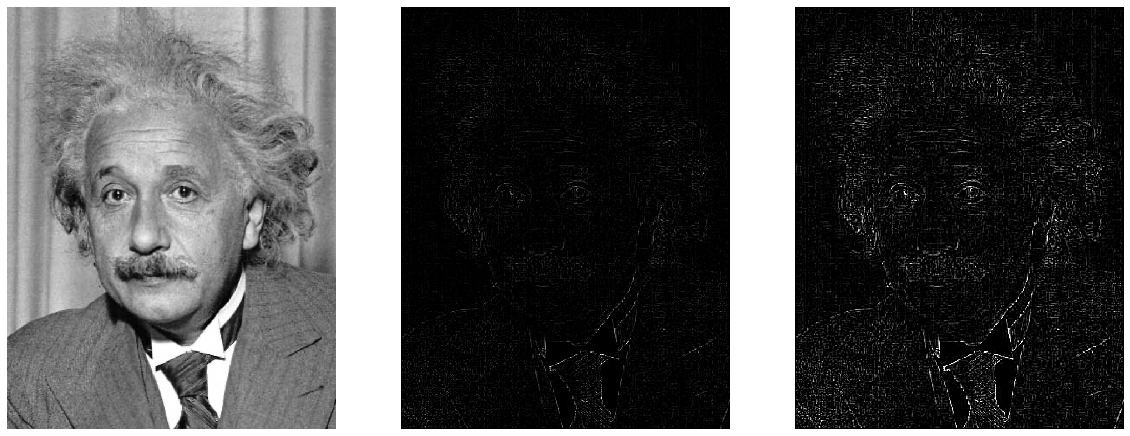

In [4]:


laplace = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])


iso_laplace = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1]
])


fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(np.clip(convolve(image,laplace,mode='constant', cval=0.0),0,1)
           ,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(np.clip(convolve(image,iso_laplace,mode='constant', cval=0.0),0,1)
           ,cmap=cm.gray)
plt.axis('off')



plt.show()

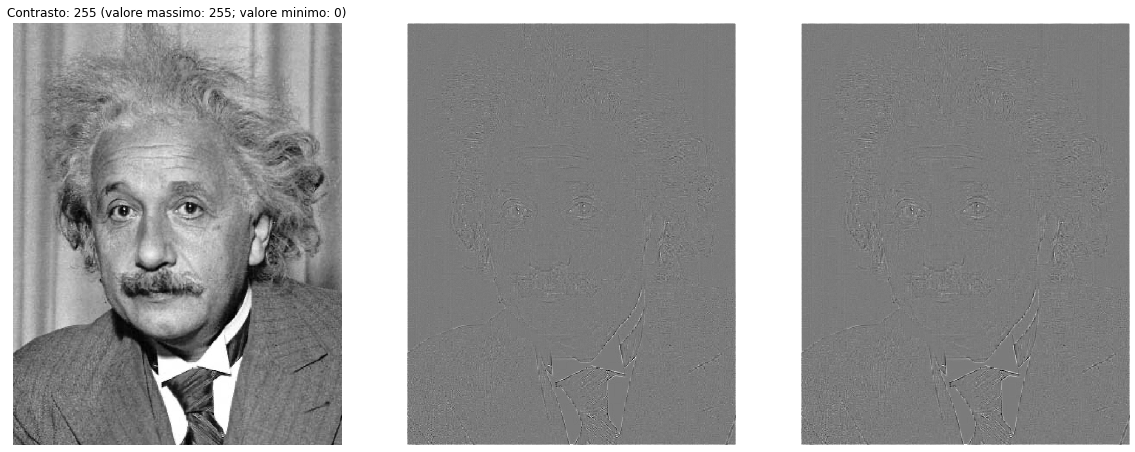

In [5]:

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(convolve(image,-laplace,mode='constant', cval=0.0)
           ,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(convolve(image,-iso_laplace,mode='constant', cval=0.0)
           ,cmap=cm.gray)
plt.axis('off')



plt.show()

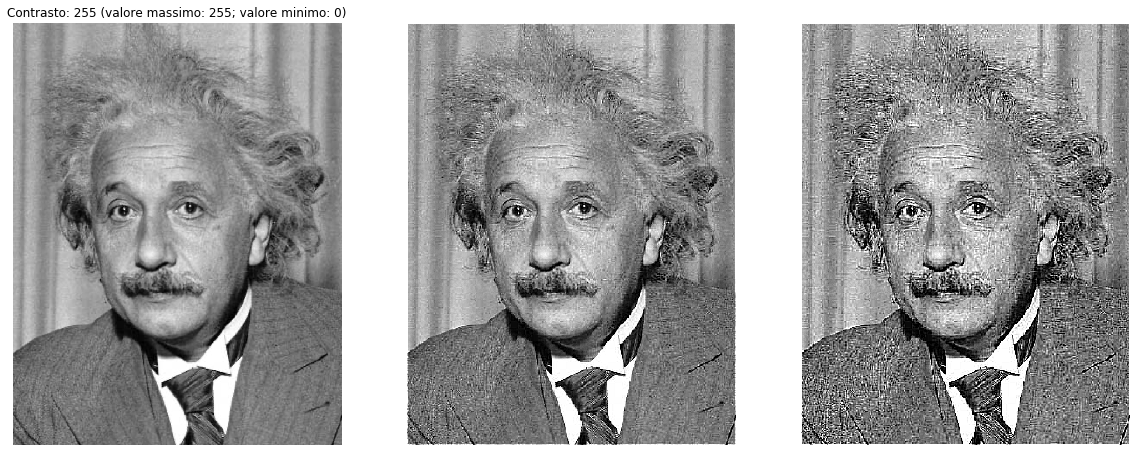

In [6]:

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(np.clip(image - convolve(image,laplace,mode='constant', cval=0.0),0,1)
           ,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(np.clip(image - convolve(image,iso_laplace,mode='constant', cval=0.0),0,1)
           ,cmap=cm.gray)
plt.axis('off')



plt.show()

# Ampiezza

In [7]:
image = rgb2gray(mp_image.imread(os.path.join(img_src,'lenna.jpg')))

G_x = filters.sobel(image,0)
G_y = filters.sobel(image,1)

M = np.sqrt(G_x**2 + G_y**2)


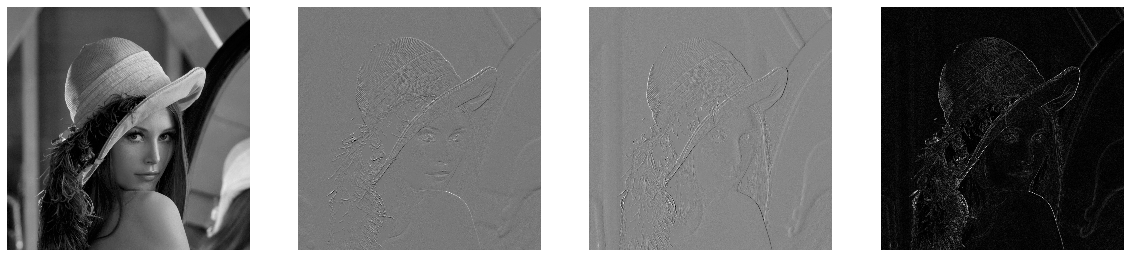

In [8]:
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 4, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 2) 
plt.imshow(G_x,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 3) 
plt.imshow(G_y,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 4) 
plt.imshow(M,cmap=cm.gray)
plt.axis('off')

plt.show()

## Derivate e filtri gaussiani

In [9]:
sigma = 3

dog_image = filters.sobel(image)
l_image = filters.laplace(image)
log_image = filters.gaussian_laplace(image,sigma)



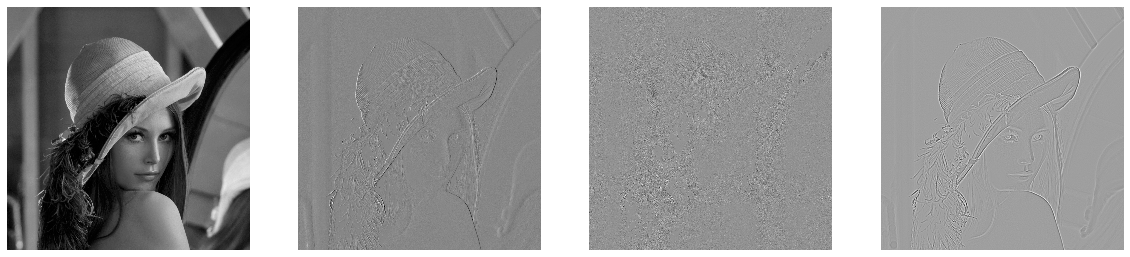

In [10]:
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 4, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 2) 
plt.imshow(dog_image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 3) 
plt.imshow(l_image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 4) 
plt.imshow(log_image,cmap=cm.gray)
plt.axis('off')

plt.show()

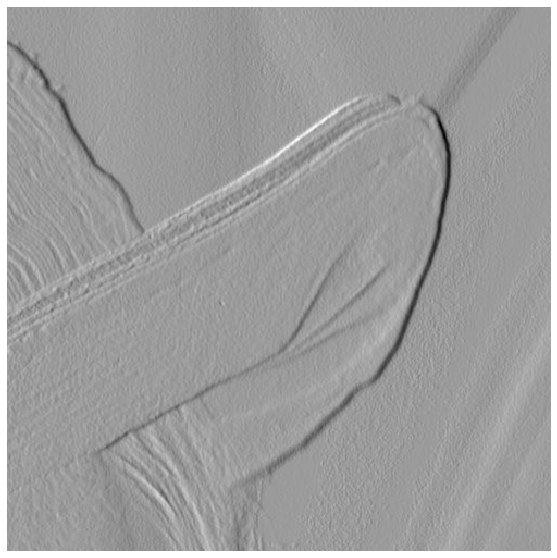

In [11]:
img_show(dog_image[400:900,1200:1700],cmap=cm.gray)

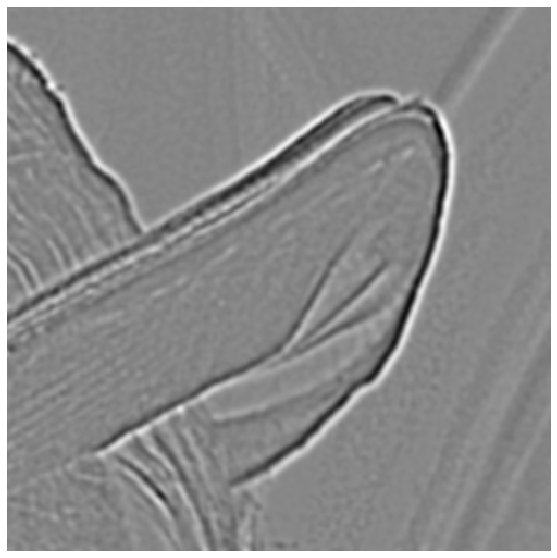

In [12]:
img_show(log_image[400:900,1200:1700],cmap=cm.gray)

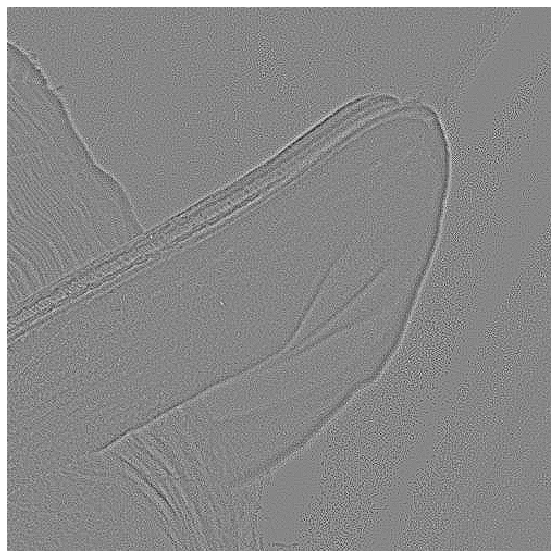

In [13]:
img_show(l_image[400:900,1200:1700],cmap=cm.gray)

# Filtraggio nel dominio delle frequenze

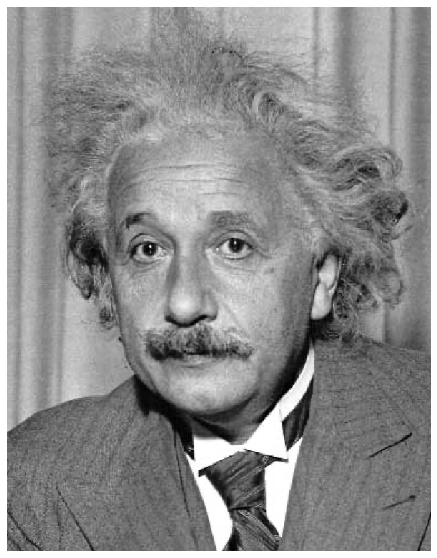

In [14]:
image = mp_image.imread(os.path.join(img_src,'einstein2.png'))
image = image[:,:,0]

img_show(image,cmap=cm.gray)

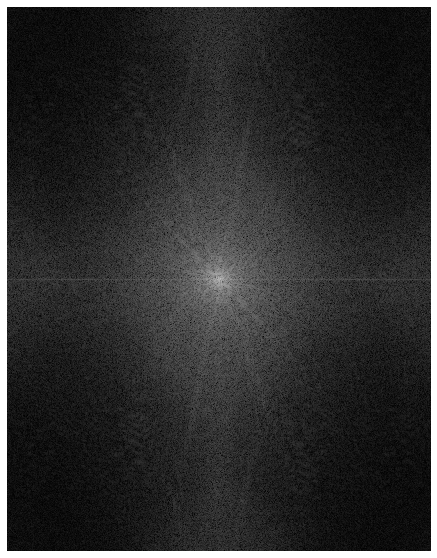

In [15]:

im_fft = np.fft.fft2(image)
img_fft_shited = np.fft.fftshift(im_fft)

f_abs = np.abs(img_fft_shited) + 1 # lie between 1 and 1e6
f_bounded = np.log(1+f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)

img_show(f_img,cmap=cm.gray)

Vediamo anche la fase

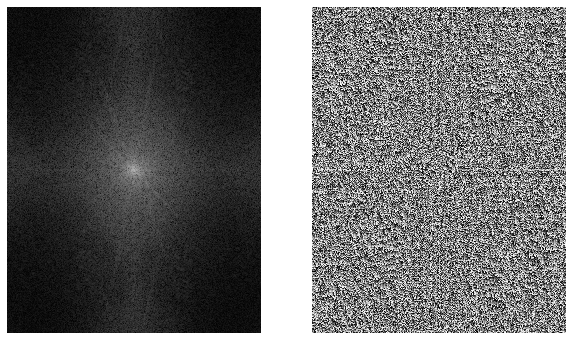

In [16]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1) 
plt.imshow(f_img,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(np.angle(img_fft_shited),cmap=cm.gray)
plt.axis('off')

plt.show()

Proviamo ad implementare un filtro passa-basso: In particolare il box filter. Il box filter dovrebbe mantenere tutte le frequenze vicine allo zero (diciamo il 10%) e tagliare le altre. 

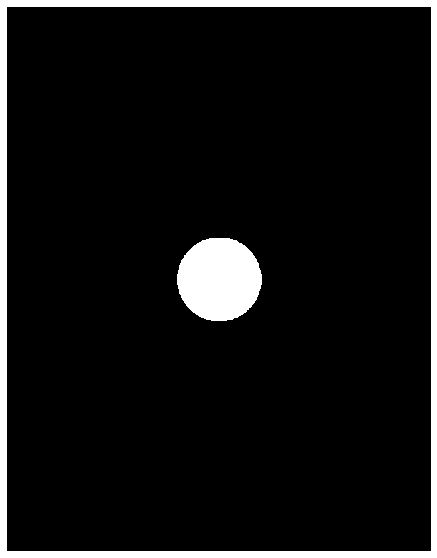

In [17]:
keep_fraction = 0.1

im_fft2 = im_fft.copy()

r, c = im_fft2.shape

def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def BoxFilterLP(fraction,imgShape):
    D0 = int(min(fraction*imgShape[:2]))
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 255
    return base

filter = BoxFilterLP(keep_fraction,np.array([r,c]))

img_show(filter,cmap=cm.gray)

#filter

Applicando il filtro di cui sopra all'ampiezza della trasformata, abbiamo: 

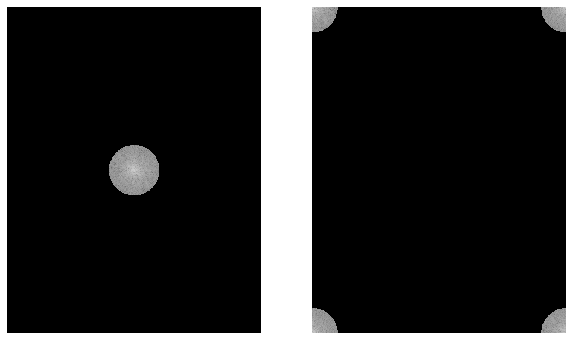

In [18]:

LowPassCenter = img_fft_shited*filter

LowPass = np.fft.ifftshift(LowPassCenter)

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1) 
plt.imshow(np.log(1+np.abs(LowPassCenter)),cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(np.log(1+np.abs(LowPass)),cmap=cm.gray)
plt.axis('off')

plt.show()


**Domanda:** Perché applichiamo la decentralizzazione?

Otteniamo a questo punto l'immagine trasformata: 

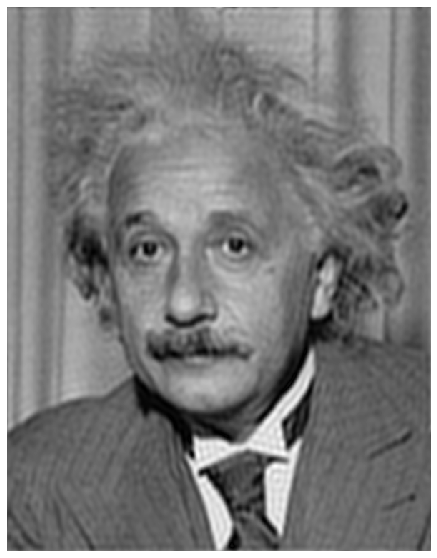

In [19]:
inverse_LowPass = np.fft.ifft2(LowPass)


img_show(np.abs(inverse_LowPass),cmap=cm.gray)

### Esercizio

Se volessimo applicare un filtro gaussiano? Come dovremmo cambiare il codice di cui sopra?


In pratica, abbiamo tagliato tutte le frequenze basse. Proviamo a ricostruire l'immagine originaria

***

Proviamo ad applicare un filtro High-Pass. Usiamo lo stesso esempio di prima ma al contrario 


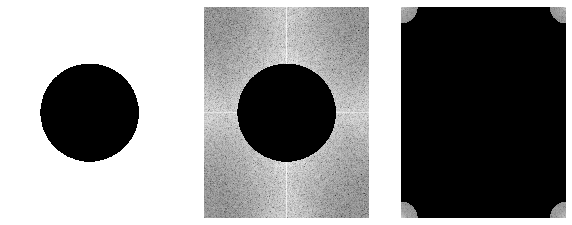

In [20]:

filter = BoxFilterLP(0.3,np.array([r,c]))

filter = 255-filter

HighPassCenter = img_fft_shited*filter

HighPass = np.fft.ifftshift(LowPassCenter)

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 3, 1) 
plt.imshow(filter,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(np.log(1+np.abs(HighPassCenter)),cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(np.log(1+np.abs(HighPass)),cmap=cm.gray)
plt.axis('off')

plt.show()

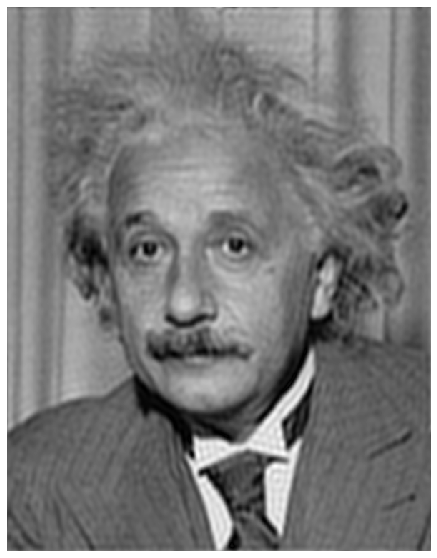

In [21]:
inverse_HighPass = np.fft.ifft2(HighPass)

img_show(np.abs(inverse_HighPass),cmap=cm.gray)

****

Come ultimo esempio, proviamo ad applicare il teorema di convoluzione 

In [23]:
#kernel_orig = np.ones((3,3)) / 9
#kernel_orig=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
kernel_orig=np.array([ [1,0,-1], [2,0,-2], [1,0,-1]])
#kernel_orig=np.transpose(kernel,2)

img = image

sz = (img.shape[0] - kernel_orig.shape[0], img.shape[1] - kernel_orig.shape[1])  # total amount of padding
kernel = np.pad(kernel_orig, (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)), 
'constant')


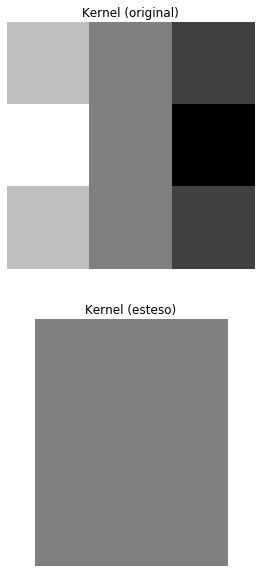

In [24]:

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2, 1, 1) 
plt.imshow(kernel_orig,cmap=cm.gray)
plt.title("Kernel (original)")
plt.axis('off')

fig.add_subplot(2, 1, 2) 
plt.title("Kernel (esteso)")
plt.imshow(kernel,cmap=cm.gray)
plt.axis('off')


plt.show()

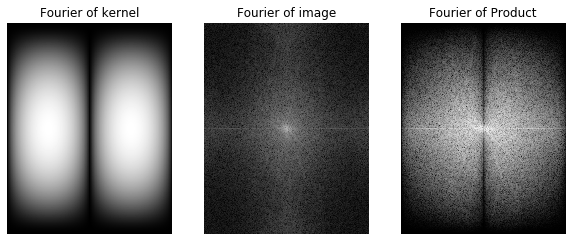

In [26]:
fft_k = np.fft.ifftshift(np.fft.fft2(kernel))
fft_im = np.fft.ifftshift(np.fft.fft2(img))

con_in_f=fft_im*fft_k


fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 3, 1) 
plt.imshow(np.log(1+np.abs(fft_k)),cmap=cm.gray)
plt.title("Fourier of kernel")
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.title("Fourier of image")
plt.imshow(np.log(1+np.abs(fft_im)),cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.title("Fourier of Product")
plt.imshow(np.log(1+np.abs(con_in_f)),cmap=cm.gray)
plt.axis('off')



plt.show()

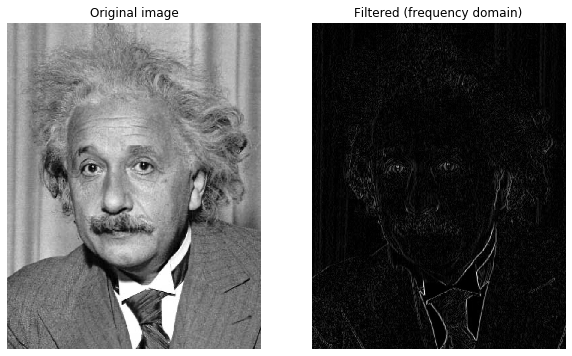

In [40]:
filtered = abs(np.fft.ifftshift(np.fft.ifft2(con_in_f)))

#filtered=np.maximum(0,np.minimum(filtered,255))



fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title("Original image")
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.title("Filtered (frequency domain)")
plt.imshow(filtered,cmap=cm.gray)
plt.axis('off')

plt.show()
